<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_2/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4-1. 선형 모델**

## **4-1-1. 정규방정식**

In [1]:
## 데이터 생성
# 선형에 비슷하도록 생성

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

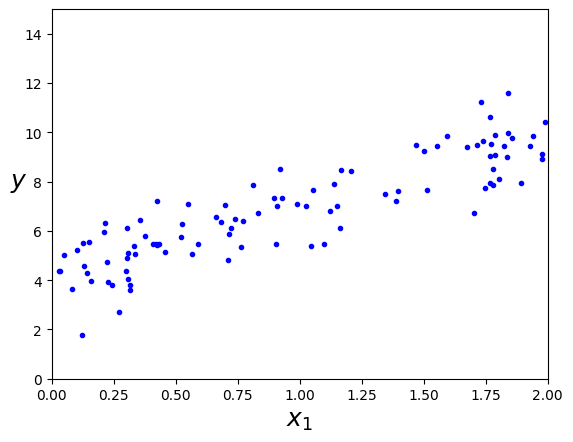

In [3]:
## 데이터 시각화

import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [4]:
## 정규방정식을 통해 파라미터 계산

X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가(bias)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# 파라미터 확인

theta_best

array([[4.16105518],
       [2.82469793]])

- 사실 해당 데이터를 생성하기 위해 사용한 함수는 $y = 4 + 3 * x_{i} + 가우시안잡음$임
> 예측된 파라미터 값과 실제 값이 매우 비슷함

In [7]:
## 추정된 파라미터로 예측

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16105518],
       [9.81045103]])

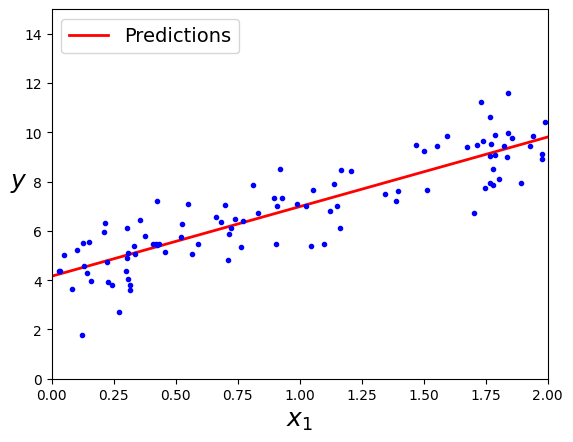

In [9]:
# 예측 시각화

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
## 선형 회귀 수행

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
# 절편 & 회귀 계수 확인
lin_reg.intercept_, lin_reg.coef_

(array([4.16105518]), array([[2.82469793]]))

In [12]:
# 예측
lin_reg.predict(X_new)

array([[4.16105518],
       [9.81045103]])

- `LinearRegression` 클래스는 `scipy,linalg,lstsq()` 함수 기반

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.16105518],
       [2.82469793]])

In [14]:
## 유사 역행렬 계산

np.linalg.pinv(X_b).dot(y)

array([[4.16105518],
       [2.82469793]])